## Exploratory Data Analysis

<br>**Author(s):** Weixiang Yu
<br>**Last run:** 08-28-20
<br>**Short description:** This notebook simply looks at the training data and explore the data structure. 

In [12]:
# import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, sys
%matplotlib inline

# use mpl style on github
mpl.rc_file('https://raw.githubusercontent.com/ywx649999311/project_template'
            '/master/%7B%7Bcookiecutter.project_name%7D%7D/src/vis/mpl/yu_basic.rc')

pd.set_option('display.max_columns', 999)

### 1. View Training Data
#### 1.1 Look at the entire files

In [3]:
train_meta = pd.read_csv('../data/plasticc_train_metadata.csv')
train_lc = pd.read_csv('../data/plasticc_train_lightcurves.csv')

In [4]:
train_meta.head()

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,true_target,true_submodel,true_z,true_distmod,true_lensdmu,true_vpec,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,615,349.0461,-61.9438,1,0.000,0.000,0.000,-9.000,0.017,92,92,1,0.000,0.000,0.000,0.0,0.0,0.0,59570.000,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,713,53.0859,-27.7844,1,1.818,1.627,0.255,45.406,0.007,88,88,1,1.817,45.703,0.000,0.0,0.0,0.0,59570.000,34,108.7,117.7,119.9,149.6,147.9,150.5
2,730,33.5742,-6.5796,1,0.232,0.226,0.016,40.256,0.021,42,42,2,0.233,40.328,0.004,4.5,0.0,0.0,60444.379,9,0.0,0.0,0.0,0.0,0.0,0.0
3,745,0.1899,-45.5867,1,0.304,0.281,1.152,40.795,0.007,90,90,1,0.301,40.969,-0.004,257.7,0.0,0.0,60130.453,38,0.0,0.0,0.0,0.0,0.0,0.0
4,1124,352.7113,-63.8237,1,0.193,0.241,0.018,40.417,0.024,90,90,1,0.193,39.866,-0.002,-368.8,0.0,0.0,60452.641,1,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848 entries, 0 to 7847
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   object_id           7848 non-null   int64  
 1   ra                  7848 non-null   float64
 2   decl                7848 non-null   float64
 3   ddf_bool            7848 non-null   int64  
 4   hostgal_specz       7848 non-null   float64
 5   hostgal_photoz      7848 non-null   float64
 6   hostgal_photoz_err  7848 non-null   float64
 7   distmod             7848 non-null   float64
 8   mwebv               7848 non-null   float64
 9   target              7848 non-null   int64  
 10  true_target         7848 non-null   int64  
 11  true_submodel       7848 non-null   int64  
 12  true_z              7848 non-null   float64
 13  true_distmod        7848 non-null   float64
 14  true_lensdmu        7848 non-null   float64
 15  true_vpec           7848 non-null   float64
 16  true_r

In [6]:
train_lc.head()

,object_id,mjd,passband,flux,flux_err,detected_bool
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [7]:
train_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421705 entries, 0 to 1421704
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   object_id      1421705 non-null  int64  
 1   mjd            1421705 non-null  float64
 2   passband       1421705 non-null  int64  
 3   flux           1421705 non-null  float64
 4   flux_err       1421705 non-null  float64
 5   detected_bool  1421705 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 65.1 MB


#### 1.2 Look at light curves for the 1st object in LC file

In [10]:
lc_615 = train_lc[train_lc.object_id == 615].copy()
lc_615.head(20)

,object_id,mjd,passband,flux,flux_err,detected_bool
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1
5,615,59752.4147,1,-1061.457031,6.472994,1
6,615,59752.4224,3,-524.954590,3.552751,1
7,615,59752.4334,4,-393.480225,3.599346,1
8,615,59752.4435,5,-355.886780,10.421921,1
9,615,59767.2968,2,-548.013550,3.462291,1


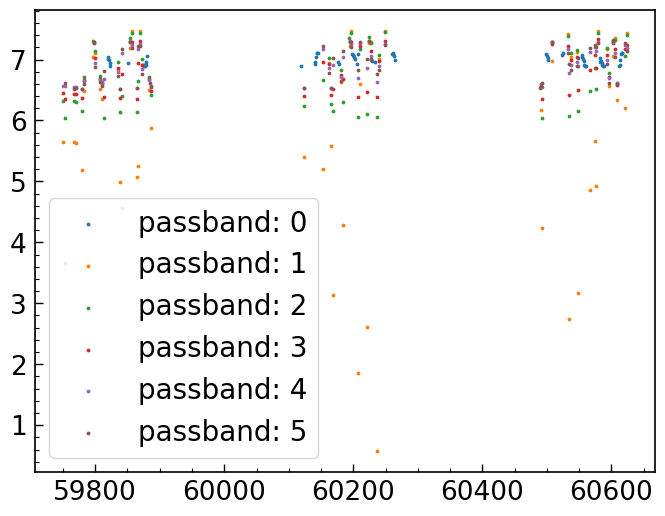

In [14]:
lc_615['flux'] -= lc_615['flux'].min()
for band in range(6):
    lc_per_f = lc_615[lc_615.passband == band]
    plt.scatter(lc_per_f.mjd, np.log(lc_per_f.flux), s=3,
        label=f'passband: {band}')
plt.legend()

### 2. Format/Test LC for fitting
#### 2.1 groupby

In [38]:
gps = train_lc.groupby(by=['object_id'])

for i, key in enumerate(gps.groups.keys()):
    if i < 5:
        print(key)
    else: break

615
713
730
745
1124


In [39]:
lc_713 = gps.get_group(713)
lc_713.head()

,object_id,mjd,passband,flux,flux_err,detected_bool
352,713,59825.2600,2,9.110147,1.013889,0
353,713,59825.2676,1,7.615042,1.160329,1
354,713,59825.2752,3,6.673631,1.932316,1
355,713,59825.2862,4,5.214194,3.018003,0
356,713,59825.2971,5,12.060948,7.163382,0


#### 2.2 Define two different way to run Dask

In [87]:
from agntk.carma.CARMATerm import *
from agntk.viz.mpl_viz import *
from scipy.optimize import minimize
from scipy.optimize import rosen, differential_evolution
from celerite import GP
import celerite
import dask

In [272]:
# placeholder for best_fit values
best_amp = np.zeros((1000, 6))
best_tau = np.zeros((1000, 6))

# passbands def
bands = ['u', 'g', 'r', 'i', 'z', 'y']

In [89]:
# define log posterior function
def neg_ll(params, y, yerr, gp):
    """This method will catch 'overflow/underflow' runtimeWarning and 
    return -inf as probablility
    """
    # change few runtimewarning action setting
    notify_method = 'raise'
    np.seterr(over=notify_method)
    np.seterr(under=notify_method)
    
    params = np.array(params)
    run = True
    lap = 0

    while run:
        if lap > 50:
            return -np.inf

        lap += 1
        try:
            gp.set_parameter_vector(params)
            neg_ll = -gp.log_likelihood(y)
            run=False
        except celerite.solver.LinAlgError:
            params += 1e-6*np.random.randn(4)
            continue
        except np.linalg.LinAlgError:
            params += 1e-6*np.random.randn(4)
            continue
        except FloatingPointError:
            return -np.inf
            
    return neg_ll

vec_neg_ll = np.vectorize(neg_ll, excluded=[1,2,3], signature='(n)->()')

__1st method only pass id, store LC in shared memory__

In [559]:
def lc_fit_id(gp_id, r_indx, de=False, debug=False, plot=False, rt=False):
    
    global best_amp, best_tau
    
    if rt:
        best_amp = np.zeros((1000, 6))
        best_tau = np.zeros((1000, 6))
    
    fail_num = 0
    lc_df = gps.get_group(gp_id)
    std = np.std(lc_df.flux.values)

    # initialize parameter and kernel
    init_tau = np.exp(np.random.uniform(0, 6, 1)[0])
    init_amp = np.random.uniform(0, 2*std, 1)[0]
    kernel = DRW_term(np.log(init_amp), np.log(init_tau))

    # loop through lc in each passband
    for band in range(6):
        
        try:
            lc_band = lc_df[lc_df.passband == band].copy()

            t = lc_band.mjd.values - lc_band.mjd.min()
            y = lc_band.flux.values
            yerr = lc_band.flux_err.values
            gp = GP(kernel, mean=np.mean(y))
            gp.compute(t, yerr)

            if de:
                # set bound based on LC std for amp
                bounds = [(-4, np.log(4*std)), (-4, 10)]
                r = differential_evolution(neg_ll, bounds=bounds, args=(y, yerr, gp))
            else:
                initial_params = gp.get_parameter_vector()
                bounds = gp.get_parameter_bounds()

                r = minimize(neg_ll, initial_params, method="L-BFGS-B", bounds=bounds,
                             args=(y, yerr, gp))
            
            best_amp[r_indx, band] = np.exp(r.x)[0]
            best_tau[r_indx, band] = np.exp(r.x)[1]
        except Exception as e:
            print(e)
            print(f'Exception at object_id: {gp_id}, passband: {band}')
            best_amp[r_indx, band] = np.nan
            best_tau[r_indx, band] = np.nan
            fail_num += 1

        # Below code is used to visualize if stuck in local minima 
        if debug:
            print(np.exp(r.x))

        if plot:
            plot_drw_ll(t, y, yerr, np.exp(r.x), gp, vec_neg_ll)

    if rt:
        return np.concatenate([best_amp[r_indx], best_tau[r_indx]])
    else:
        return fail_num

In [194]:
%%time
dask.delayed(lc_fit_id)(713, 0).compute()

CPU times: user 38.1 ms, sys: 2.16 ms, total: 40.3 ms
Wall time: 38.6 ms


0

In [195]:
%%time
dask.delayed(lc_fit_id)(713, 0, de=True).compute()

CPU times: user 223 ms, sys: 4.01 ms, total: 227 ms
Wall time: 227 ms


0

<span style='color:red'>__Remark:__</span> It is obvisous that $\texttt{scipy.minimize}$ is faster if the LL surface is smooth and behaves well.

__2nd method will pass LC into the dask function__

In [268]:
def lc_fit_data(lc_df, r_indx, de=False, debug=False, plot=False, rt=False):
    
    if rt:
        best_amp = np.zeros((1000, 6))
        best_tau = np.zeros((1000, 6))
    
    fail_num = 0
    lc_df = lc_df.copy()
    std = np.std(lc_df.flux.values)
    
    # initialize parameter and kernel
    init_tau = np.exp(np.random.uniform(0, 6, 1)[0])
    init_amp = np.random.uniform(0, 2*std, 1)[0]
    kernel = DRW_term(np.log(init_amp), np.log(init_tau))

    # loop through lc in each passband
    for band in range(6):
        
        try:
            lc_band = lc_df[lc_df.passband == band].copy()

            t = lc_band.mjd.values - lc_band.mjd.min()
            y = lc_band.flux.values
            yerr = lc_band.flux_err.values
            gp = GP(kernel, mean=np.mean(y))
            gp.compute(t, yerr)

            if de:
                # set bound based on LC std for amp
                bounds = [(0, np.log(2*std)), (0, 7)]
                r = differential_evolution(neg_ll, bounds=bounds, args=(y, yerr, gp))
            else:
                initial_params = gp.get_parameter_vector()
                bounds = gp.get_parameter_bounds()

                r = minimize(neg_ll, initial_params, method="L-BFGS-B", bounds=bounds,
                             args=(y, yerr, gp))
            
            best_amp[r_indx, band] = np.exp(r.x)[0]
            best_tau[r_indx, band] = np.exp(r.x)[1]
        except Exception as e:
            print(e)
            print(f'Exception at object_id: {gp_id}, passband: {band}')
            best_amp[r_indx, band] = np.nan
            best_tau[r_indx, band] = np.nan
            fail_num += 1
        
        # Below code is used to visualize if stuck in local minima 
        if debug:
            print(np.exp(r.x))

        if plot:
            plot_drw_ll(t, y, yerr, np.exp(r.x), gp, vec_neg_ll)
    
    if rt:
        return np.concatenate([best_amp[r_indx], best_tau[r_indx]])
    else:
        return fail_num

In [198]:
%%time
dask.delayed(lc_fit_data)(lc_713, 1).compute()

CPU times: user 42.1 ms, sys: 3.42 ms, total: 45.5 ms
Wall time: 43 ms


0

In [199]:
%%time
dask.delayed(lc_fit_data)(lc_713, 1, de=True).compute()

CPU times: user 252 ms, sys: 2.97 ms, total: 255 ms
Wall time: 254 ms


0

#### 2.3 Now test with 1000 LCs

In [157]:
%%time
total = []
for i, key in enumerate(gps.groups.keys()):
    if i < 1000:
        total.append(lc_fit_id(key, i, de=False))
    else:
        break
total_rt = dask.delayed(sum)(total).compute()

overflow encountered in exp
Exception at object_id: 86456, passband: 5
CPU times: user 59.5 s, sys: 24.9 s, total: 1min 24s
Wall time: 1min 4s


In [200]:
print('Run multiple times with minimize')
for i in range(5):
    print(f'\nNumber of Run: {i}')
    lc_fit_id(86456, 0, debug=True)

Run multiple times with minimize

Number of Run: 0
[0.7661776  0.06526936]
[3.34301119 0.06526936]
[12.55347915  0.06526936]
[26.99330812  0.06526936]
[42.3889328   0.06526937]
[56.66809703  0.06526937]

Number of Run: 1
[0.76616628 0.06820875]
[3.34301104 0.06820875]
[12.5534783   0.06820875]
[26.99330795  0.06820875]
[42.38893723  0.06820875]
[56.66811052  0.06820875]

Number of Run: 2
[1.47186694e-03 1.53189364e+01]
[  6.4097087  544.06711967]
[  25.77980459 1884.37528784]
[  45.40241121 2982.30581275]
[  57.37820249 2874.78595646]
[  64.33760847 2042.64655652]

Number of Run: 3
[1.26812826e-03 4.86355258e+01]
[  6.40968526 544.06249898]
[  25.77935674 1884.30530461]
[  45.40218761 2982.27436037]
[  57.37985405 2874.95817212]
[  64.33795344 2042.66908609]

Number of Run: 4
[0.76616587 0.06681592]
[3.34301089 0.06681592]
[12.55347866  0.06681592]
[26.99331015  0.06681592]
[42.3889373   0.06681592]
[56.6680972   0.06681592]


In [201]:
print('Run multiple times with differential evolution')
for i in range(5):
    print(f'\nNumber of Run: {i}')
    lc_fit_id(86456, 0, debug=True, de=True)

Run multiple times with differential evolution

Number of Run: 0
[1. 1.]
[  6.40969955 544.06535932]
[  19.98532985 1096.63315843]
[  28.46712408 1096.63315843]
[  36.67343227 1096.63315843]
[  48.63941479 1096.63315843]

Number of Run: 1
[1. 1.]
[  6.40970028 544.06506969]
[  19.98520683 1096.63315843]
[  28.46712835 1096.63315843]
[  36.67344171 1096.63315843]
[  48.6396809  1096.63315843]

Number of Run: 2
[1. 1.]
[  6.40969926 544.06537549]
[  19.98533048 1096.63315843]
[  28.46712296 1096.63315843]
[  36.67343559 1096.63315843]
[  48.63941117 1096.63315843]

Number of Run: 3
[1. 1.]
[  6.39968275 542.18660805]
[  19.9853441  1096.63315843]
[  28.46712414 1096.63315843]
[  36.67350104 1096.63315843]
[  48.63941751 1096.63315843]

Number of Run: 4
[1. 1.]
[  6.40965743 544.05668212]
[  19.98533213 1096.63315843]
[  28.46712468 1096.63315843]
[  36.67343625 1096.63315843]
[  48.6393735  1096.63315843]


<span style='color:red'>__Remark:__</span> For less well behaved light curves, even fitting a simple DRW model can result in unstable/inconsistent best-fit parameters from $\texttt{optimize.minimize}$. $\texttt{differential_evolution}$ is a much more robust opitimization algorithm. We can give a closer look later in this notebook. From now on, we switch to use DE for more reliable fits.

In [202]:
%%time
total = []
for i, key in enumerate(gps.groups.keys()):
    if i < 1000:
        total.append(dask.delayed(lc_fit_id)(key, i, de=True))
    else:
        break
total_rt = dask.delayed(sum)(total).compute()

CPU times: user 6min 34s, sys: 2min 15s, total: 8min 49s
Wall time: 7min 18s


In [204]:
%%time
total = []
for i, key in enumerate(gps.groups.keys()):
    if i < 1000:
        lc = train_lc[train_lc.object_id == key]
        total.append(dask.delayed(lc_fit_data)(lc, i, de=True))
    else:
        break
total_rt = dask.delayed(sum)(total).compute()

CPU times: user 6min 46s, sys: 2min 17s, total: 9min 4s
Wall time: 7min 31s


<span style='color:red'>__Result:__</span> Using __differential_evolution__, every fit takes about 0.45 sec. It seems like dask.delayed doesn't use multiple cores, need to explore distributed for better comparison. And passing the whole LC into the dask.delayed function doesn't seem slow the process down. 

#### 2.4 Try dask.distributed 

In [205]:
from dask.distributed import Client
client = Client()

In [231]:
%%time
total = []
for i, key in enumerate(gps.groups.keys()):
    if i < 1000:
        lc = train_lc[train_lc.object_id == key]
        r = client.submit(lc_fit_data, lc, i, de=True, rt=True)
        total.append(r)
    else:
        break
        
total_rt = client.gather(total, errors='skip')

CPU times: user 16.7 s, sys: 1.58 s, total: 18.3 s
Wall time: 2min 59s


In [ ]:
%%time
total = []
for i, key in enumerate(gps.groups.keys()):
    if i < 1000:
        r = client.submit(lc_fit_id, key, i, de=True, rt=True)
        total.append(r)
    else:
        break
        
total_rt = client.gather(total, errors='skip')

<span style='color:red'>__Remark:__</span> The above cell took forever to run, so stopped. I suspect that pandas use GIL to prevent different cores to access the same memory. So, if we use dask.distributed, we need to pass the actual LC into the function. On average, fitting each object takes about 0.72 sec/core, but with many core, we can reduce the total time.  

### 3. Take a better look at those that didn't seem behave well. 
#### 3.1 Object: 86456, Targe: 42, Type: Core Collapse Type II SN

In [301]:
train_meta[train_meta.object_id == 86456]

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,true_target,true_submodel,true_z,true_distmod,true_lensdmu,true_vpec,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
506,86456,33.5742,-5.3794,1,0.213,0.219,0.014,40.178,0.017,42,42,3,0.213,40.112,0.001,-65.9,3.1,0.329,59762.879,6,0.0,0.0,0.0,0.0,0.0,0.0


In [444]:
i = 770
print(keys_ls[i])
total_rt[i]

127056


array([23.8290059 , 58.03577086, 53.53418735, 52.65958104, 56.27042717,
       55.98602366, 46.57132703, 26.89362935, 49.0104968 , 65.67244859,
       73.90211108, 70.2800963 ])

/Users/weixiang/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


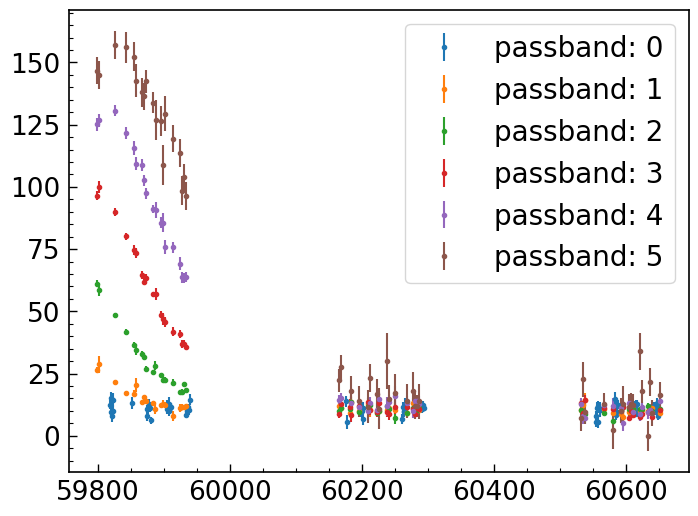

In [429]:
lc = train_lc[train_lc.object_id == 86456]
lc['flux'] -= lc['flux'].min()
for band in range(6):
    lc_per_f = lc[lc.passband == band]
    plt.errorbar(lc_per_f.mjd, lc_per_f.flux, lc_per_f.flux_err, fmt='.',
        label=f'passband: {band}')
#     scale_y =np.log(lc_per_f.flux+meta[f'tflux_{bands[band]}'].values[0])
#     plt.scatter(lc_per_f.mjd, scale_y - np.mean(scale_y), s=2,
#         label=f'passband: {band}')
plt.legend()

[0.76616518 0.0404074 ]
[  6.40965238 544.05648832]
[  25.77882215 1884.22816643]
[  45.39980067 2981.95399389]
[  57.37754487 2874.71309223]
[  64.33654755 2042.56262747]


0

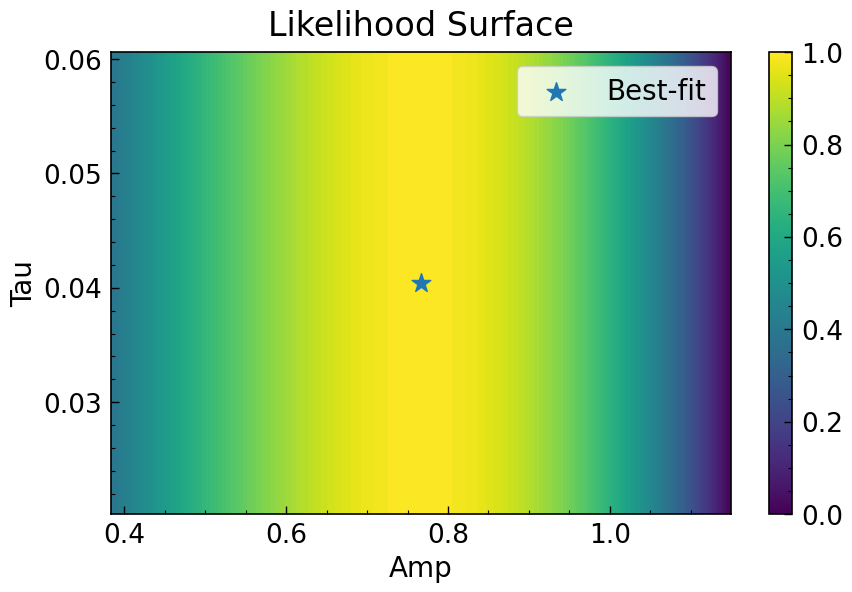

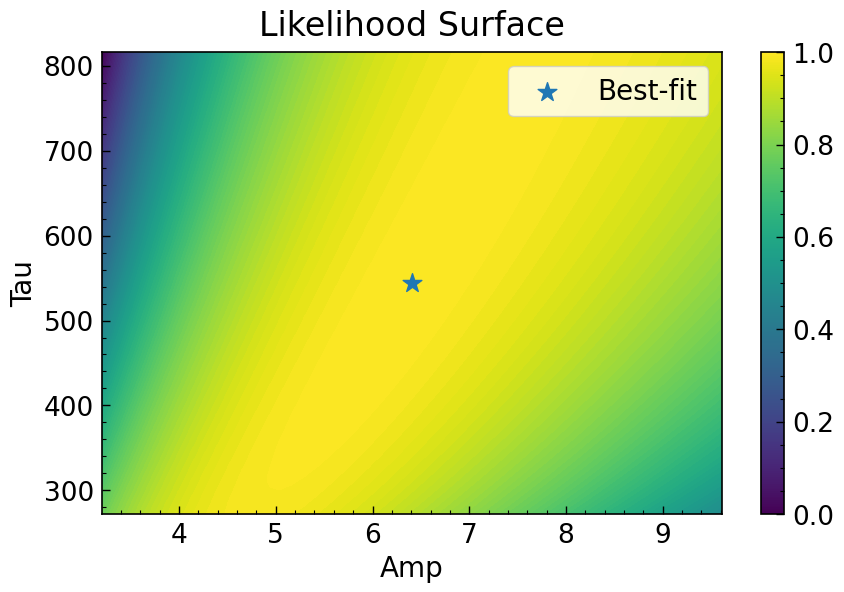

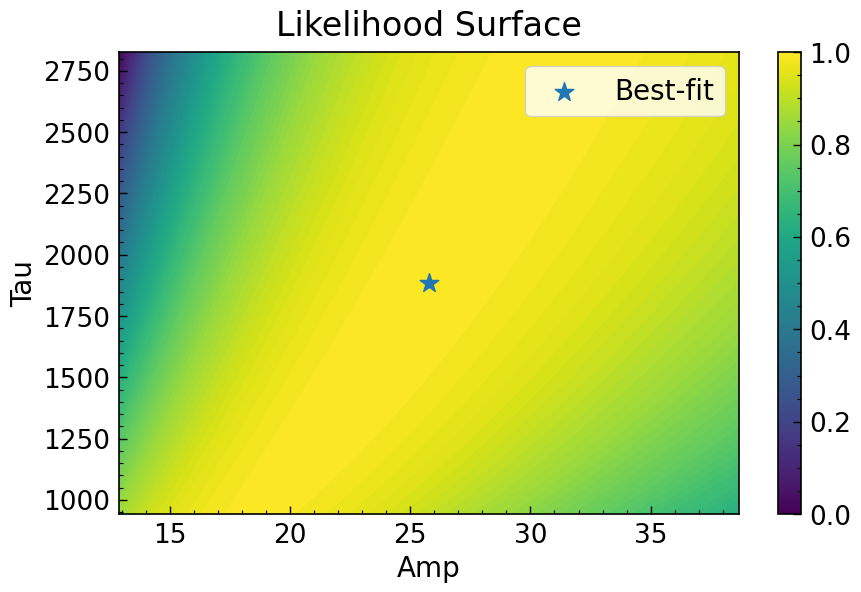

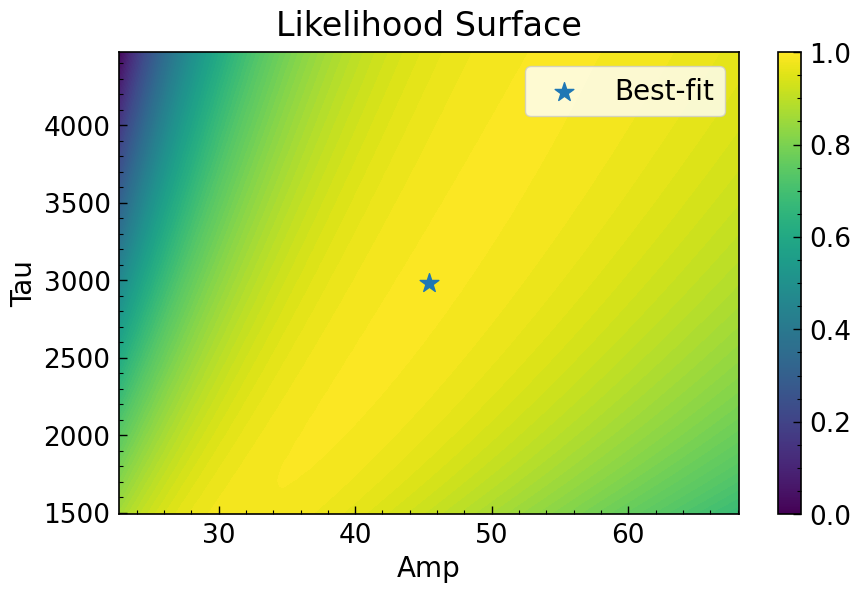

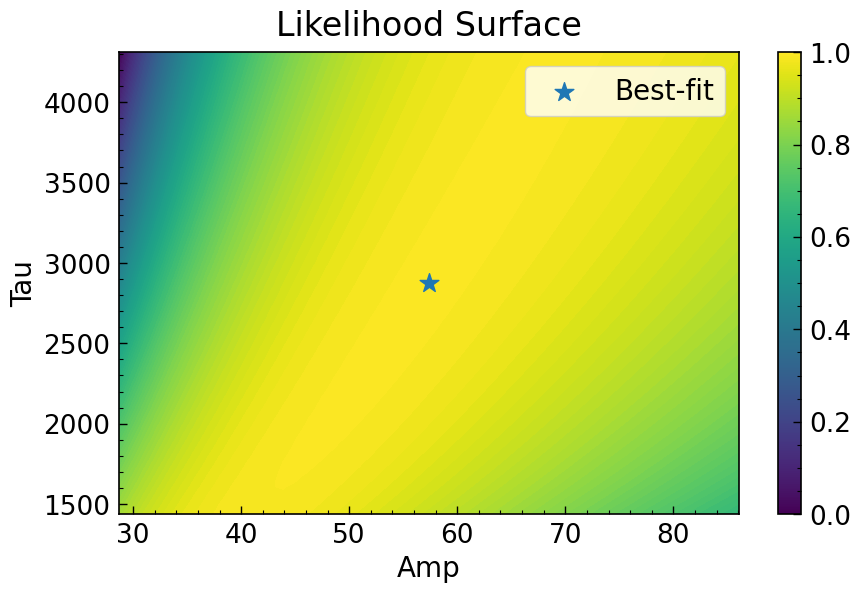

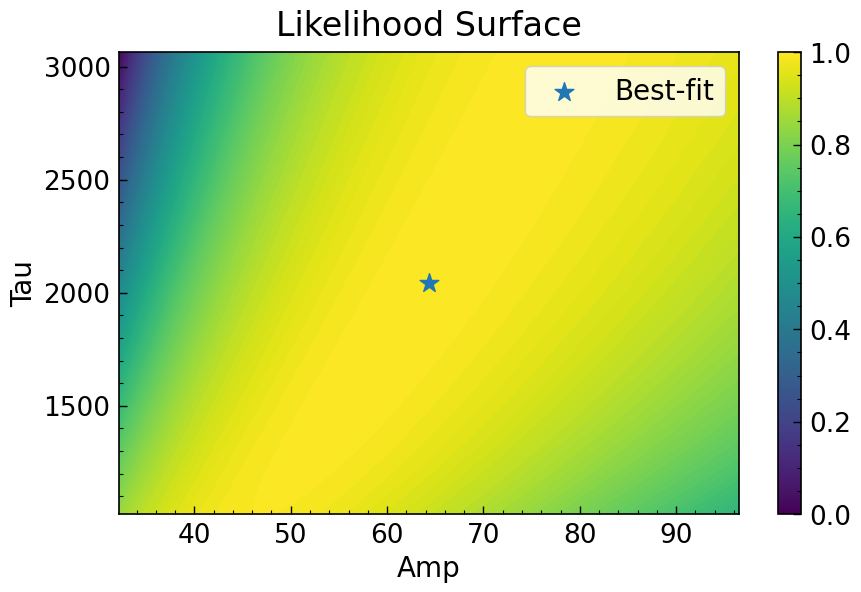

In [281]:
lc_fit_id(86456, 0, de=True, plot=True, debug=True)

<span style='color:red'>__Remark:__</span> The above shows a very interesting result, seems like a DRW model well fit a SNe light cuves, the best-fit tau and amp increase as we go to redder bands. 

#### 3.2 Object: 7698, Target: 90, Type: SNIa

In [300]:
train_meta[train_meta.object_id == 7698]

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,true_target,true_submodel,true_z,true_distmod,true_lensdmu,true_vpec,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
40,7698,347.0134,-62.5086,1,0.263,0.188,0.022,39.801,0.018,90,90,1,0.261,40.61,0.002,112.3,0.0,0.0,59590.891,40,0.0,0.0,0.0,0.0,0.0,0.0


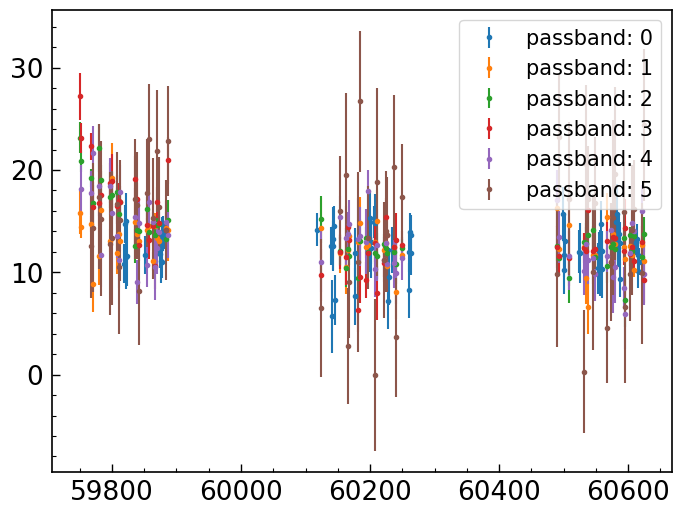

In [458]:
lc = train_lc[train_lc.object_id == 7698]
max_err = np.percentile(lc.flux_err, 99)
lc = lc[lc.flux_err < max_err]
lc['flux'] -= lc['flux'].min()
for band in range(6):
    lc_per_f = lc[lc.passband == band]
    plt.errorbar(lc_per_f.mjd, lc_per_f.flux, lc_per_f.flux_err, fmt='.',
        label=f'passband: {band}')
#     scale_y =np.log(lc_per_f.flux+meta[f'tflux_{bands[band]}'].values[0])
#     plt.scatter(lc_per_f.mjd, scale_y - np.mean(scale_y), s=2,
#         label=f'passband: {band}')
plt.legend(fontsize=15, loc=1)

[0.01831564 0.83466751]
[  0.72561054 277.24999842]
[  3.34075379 486.30866373]
[  3.91076706 277.88849341]
[ 1.82213952 62.80924833]
[ 0.3806422  98.45128022]


0

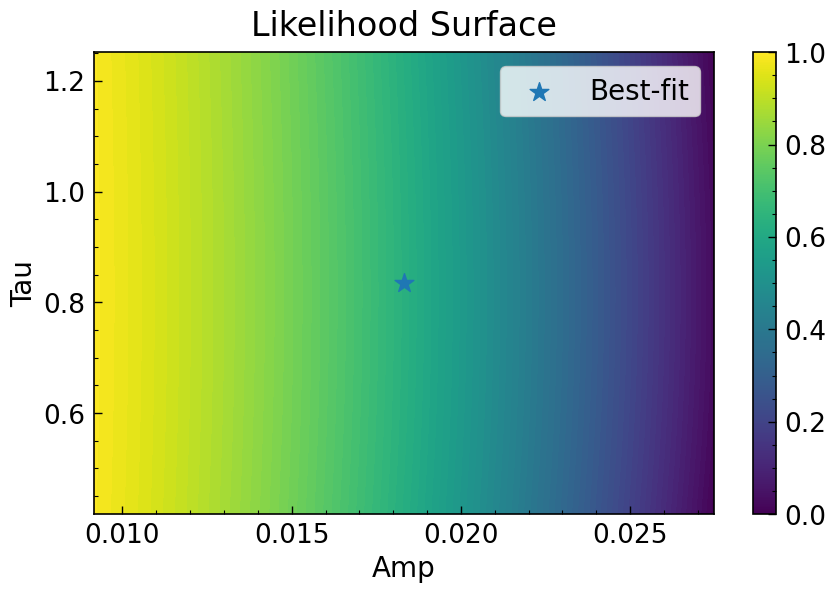

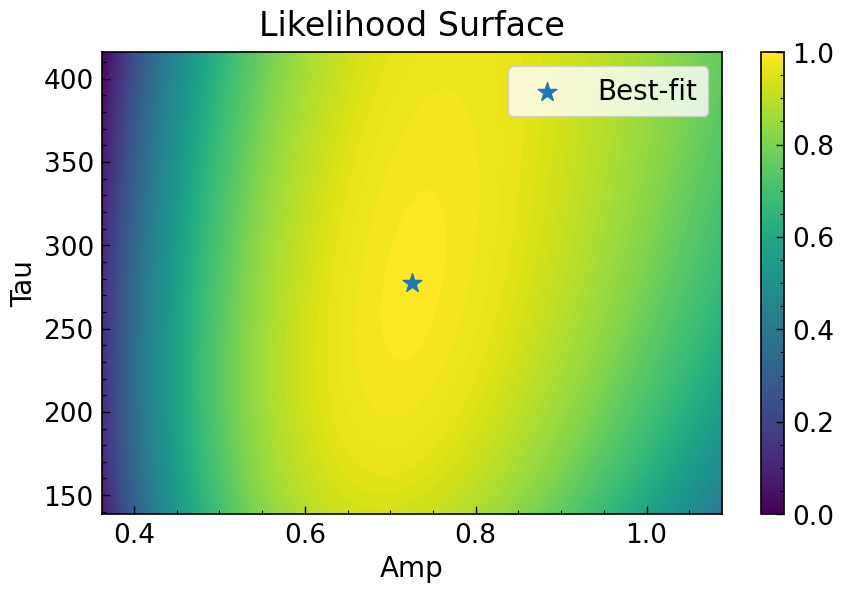

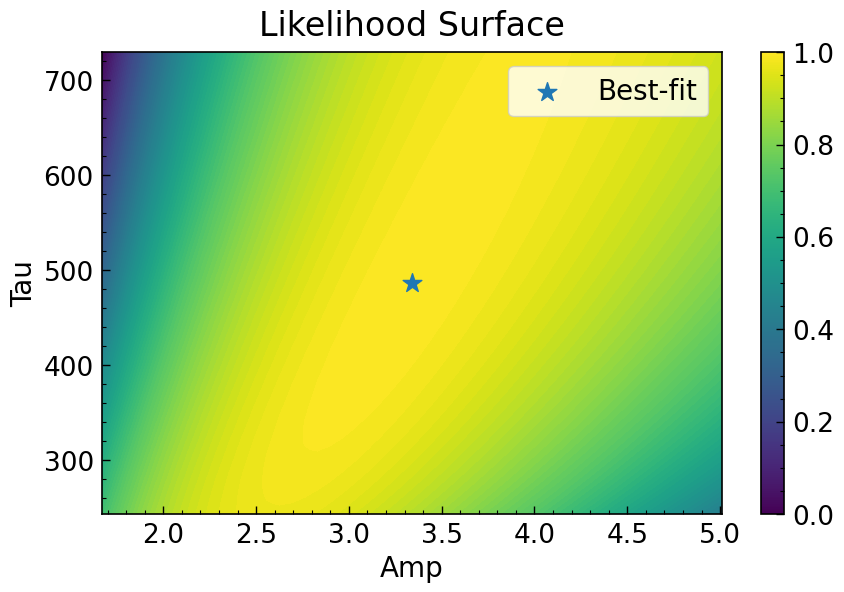

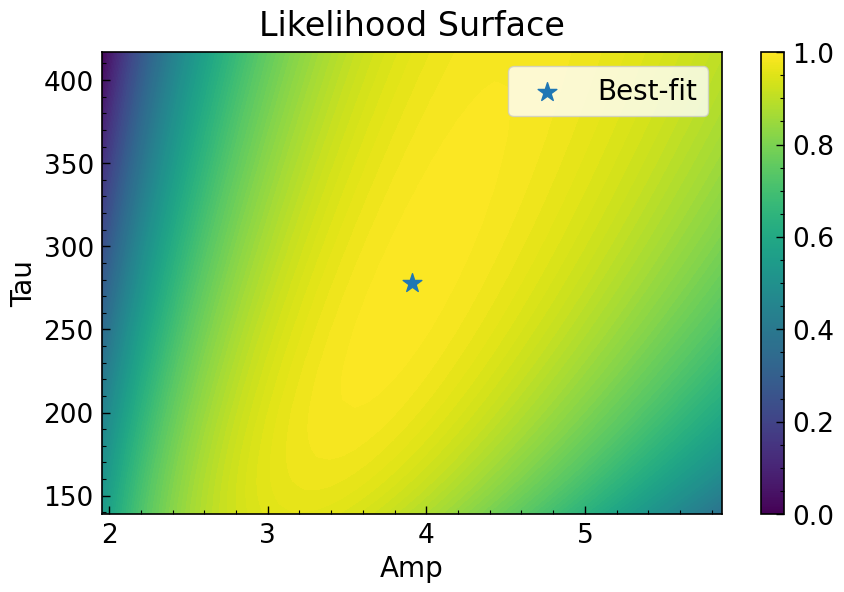

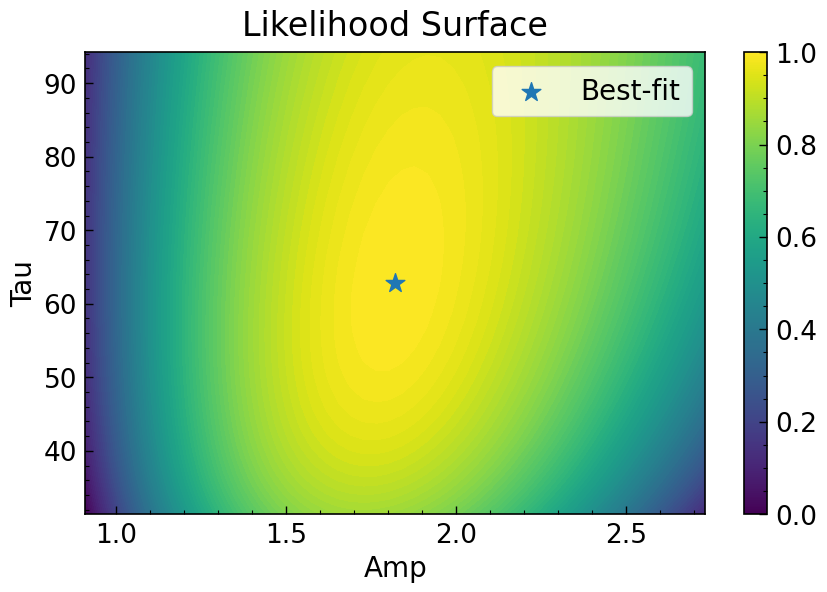

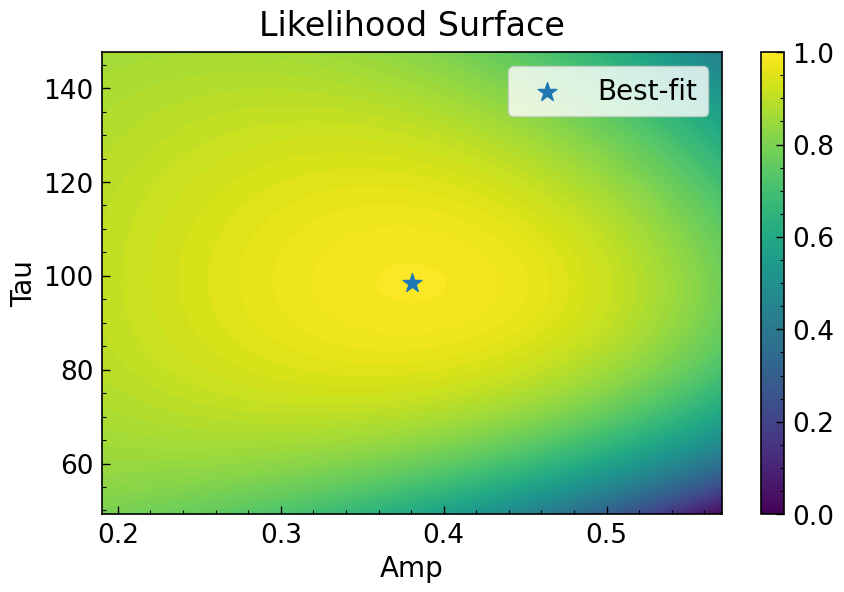

In [298]:
lc_fit_id(7698, 0, de=True, plot=True, debug=True)

#### 3.3 Object: 18645, Target: 16, Type: EB

In [351]:
train_meta[train_meta.object_id == 18645]

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,true_target,true_submodel,true_z,true_distmod,true_lensdmu,true_vpec,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
960,162152,348.5294,-61.7554,1,0.0,0.0,0.0,-9.0,0.016,16,16,1,0.0,0.0,0.0,0.0,0.0,0.0,59570.0,85,2123.4,20019.7,20904.6,15070.6,9602.2,4005.7


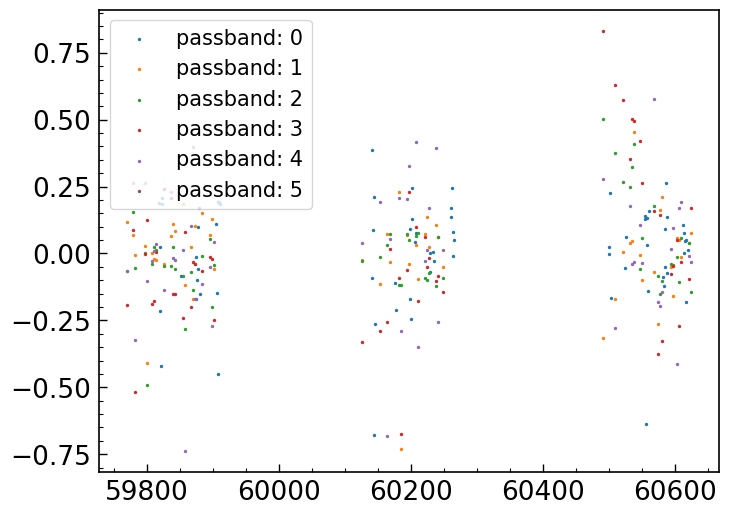

In [614]:
lc = train_lc[train_lc.object_id == 18645]
max_err = np.percentile(lc.flux_err, 99)
lc = lc[lc.flux_err < max_err]
lc['flux'] -= lc['flux'].min()
for band in range(6):
    lc_per_f = lc[lc.passband == band]
#     plt.errorbar(lc_per_f.mjd, lc_per_f.flux, lc_per_f.flux_err, fmt='.',
#         label=f'passband: {band}')
    scale_y =np.log(lc_per_f.flux+meta[f'tflux_{bands[band]}'].values[0])
    plt.scatter(lc_per_f.mjd, scale_y - np.mean(scale_y), s=2,
        label=f'passband: {band}')
plt.legend(fontsize=15)

[0.01831564 0.05441057]
[0.39546542 0.20994131]
[  1.47021112 115.42772531]
[  3.68599664 151.04201684]
[0.01944385 0.12509249]
[0.02109718 0.04780862]


0

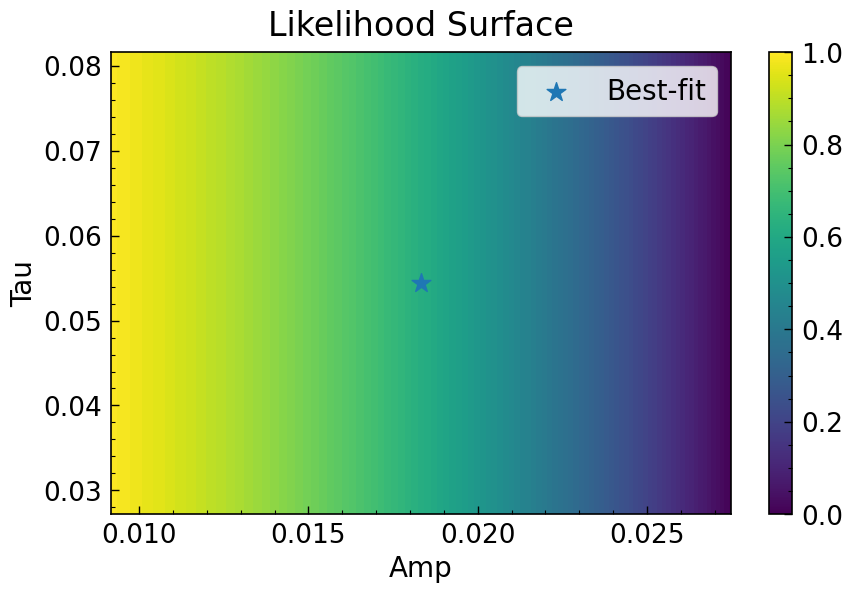

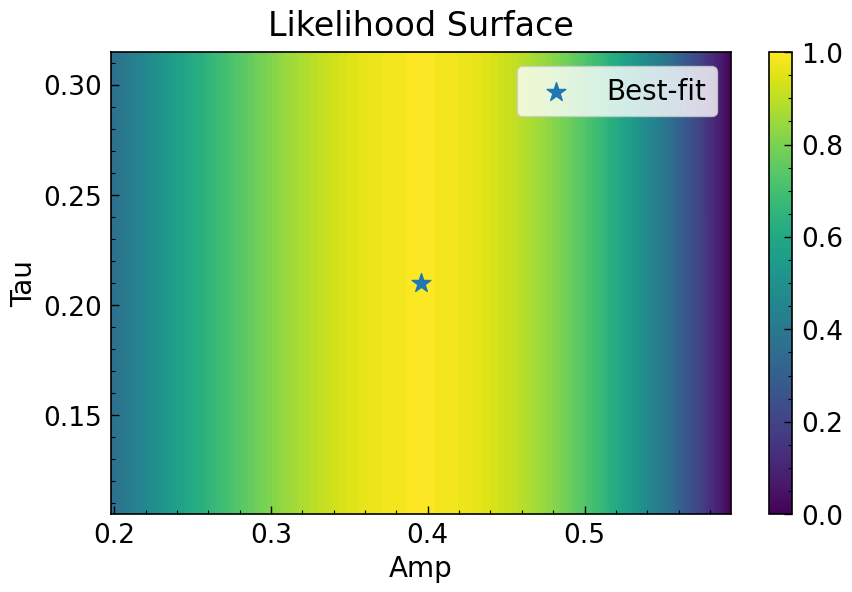

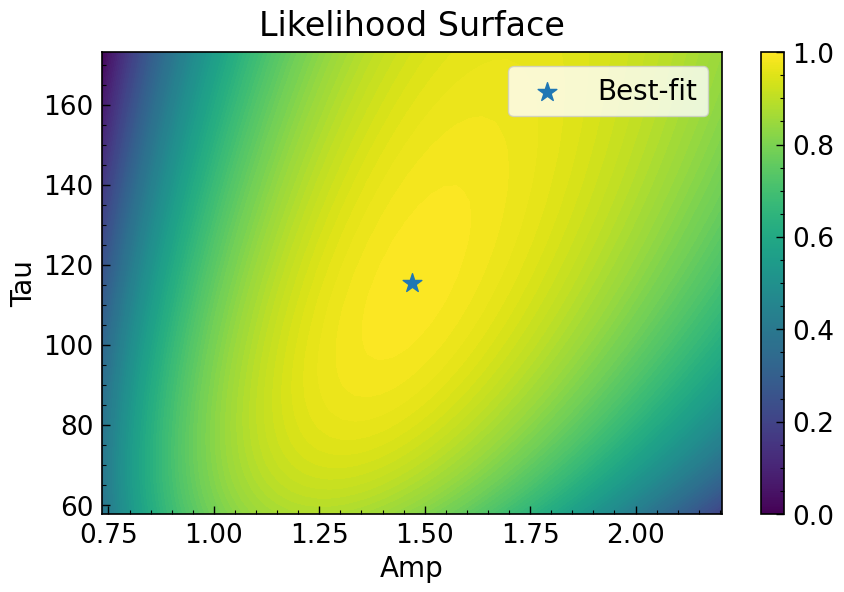

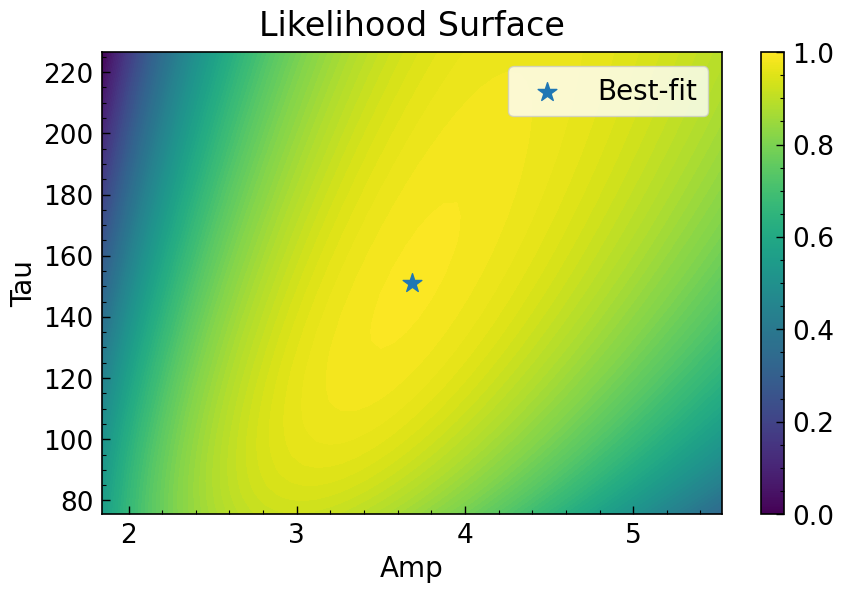

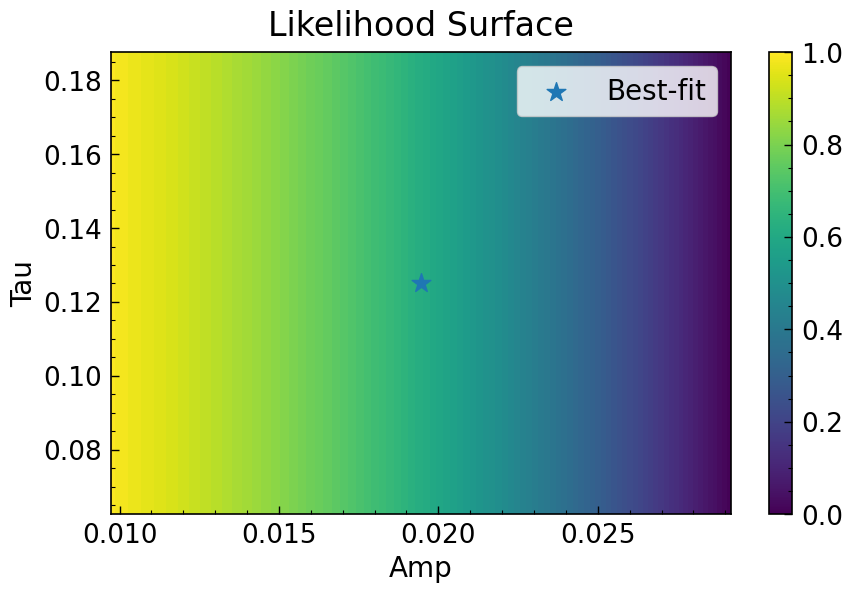

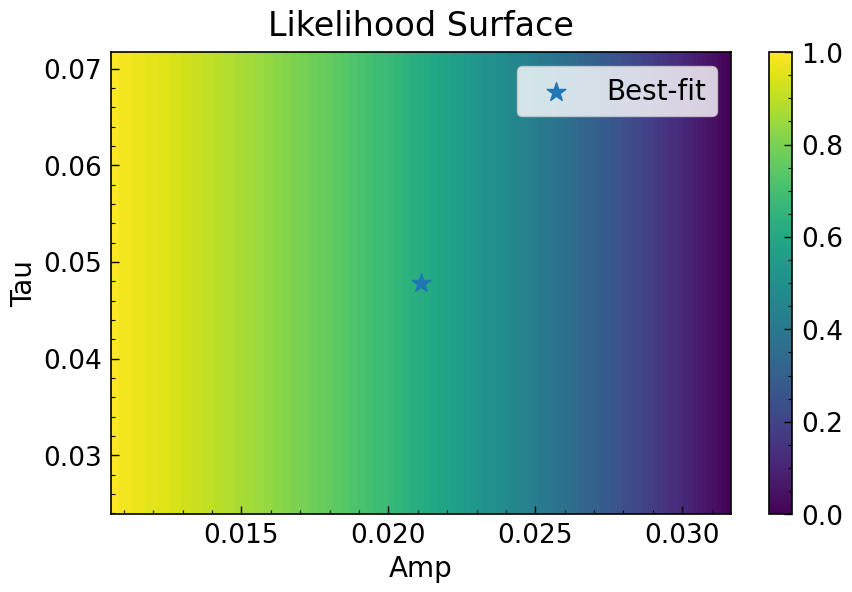

In [459]:
lc_fit_id(18645, 0, de=True, plot=True, debug=True)

___
<span style='color:red'>__IMPORTANT Conclusion:__</span> In terms of classification, a few notes.
- We need to first get rid of objects that have large change in brightness within a short period of time (e.g., M-dwarf, even some SNe). 
- Class 42 seems to have large DRW amplitude and tau in r and i, no variability in u in particular. (not really, see 127056). This trend could probably applies many SNe
- The direction of the gradiant can also be used to as a feature, static source tends to have gradiant only in the amp direction. 
- Mira -> Increasing DRW amplitude as we go redder?
- EB -> Hard one
- Some objects doesn't work by directly taking the log of flux, e.g. AGN, probably due to the template flux is quite large. If take the log, needs to add back the template flux and subtract the mean
- Faint SNe -> doesn't work well in log
- RR -> low DRW amp in u?